## Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to **predict the purchase amount of customer** against various products which will help them to create personalized offer for customers against different products.


https://datahack.analyticsvidhya.com/contest/black-friday/#About

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import statistics
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
train = pd.read_csv('/content/drive/My Drive/black_friday_data/train.csv')
test = pd.read_csv('/content/drive/My Drive/black_friday_data/test.csv')
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
print(train.shape)
print(train.info())
print(train.describe())

(550068, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB
N

## Fastai library

In [5]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.tabular import * 
import os
import warnings 
warnings.filterwarnings('ignore')

### Data Preprocessing

treat all variables as categorical variables 

Use 20% of training data as validation set

Embedding categorical variables to numerical representations


In [99]:
path = '/content/drive/My Drive/black_friday_data/'
modelpath = path + 'models/'

# variable types
cat_names = ['User_ID', 'Product_ID','Gender', 'Age', 'Occupation', 'City_Category', 'Marital_Status', 'Stay_In_Current_City_Years',
             'Product_Category_1', 'Product_Category_2', 'Product_Category_3']          
cont_names = []
dep_var = 'Purchase'

# df = train.drop(['User_ID', 'Product_ID'], axis=1)
# test_df = test.drop(['User_ID', 'Product_ID'], axis=1)
test_df = TabularList.from_df(test, cat_names=cat_names, cont_names=cont_names)
# Data prepocessing
#procs = [FillMissing, Categorify, Normalize]
procs = [Categorify]

data = (TabularList.from_df(train, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                            .split_by_rand_pct(valid_pct = 0.2, seed=4)
                            .label_from_df(cols=dep_var, label_cls=FloatList)
                            .add_test(test_df).databunch())


In [7]:
data

TabularDataBunch;

Train: LabelList (440055 items)
x: TabularList
User_ID 1000001; Product_ID P00069042; Gender F; Age 0-17; Occupation 10; City_Category A; Marital_Status 0; Stay_In_Current_City_Years 2; Product_Category_1 3; Product_Category_2 #na#; Product_Category_3 #na#; ,User_ID 1000001; Product_ID P00087842; Gender F; Age 0-17; Occupation 10; City_Category A; Marital_Status 0; Stay_In_Current_City_Years 2; Product_Category_1 12; Product_Category_2 #na#; Product_Category_3 #na#; ,User_ID 1000001; Product_ID P00085442; Gender F; Age 0-17; Occupation 10; City_Category A; Marital_Status 0; Stay_In_Current_City_Years 2; Product_Category_1 12; Product_Category_2 14.0; Product_Category_3 #na#; ,User_ID 1000002; Product_ID P00285442; Gender M; Age 55+; Occupation 16; City_Category C; Marital_Status 0; Stay_In_Current_City_Years 4+; Product_Category_1 8; Product_Category_2 #na#; Product_Category_3 #na#; ,User_ID 1000003; Product_ID P00193542; Gender M; Age 26-35; Occupation 15; City_Cate

In [8]:
data.show_batch(rows=2)

User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2,Product_Category_3,target
1002990,P00049642,M,36-45,12,B,1,1,8,14.0,#na#,7756.0
1005688,P00251242,F,18-25,4,B,0,1,5,11.0,#na#,3496.0


### Train: Deep Learning Model

#### Model 1: [200, 64, 32, 1]

In [52]:
learn = tabular_learner(data, layers=[200,64,32], metrics=rmse, callback_fns=ShowGraph)

epoch,train_loss,valid_loss,root_mean_squared_error,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


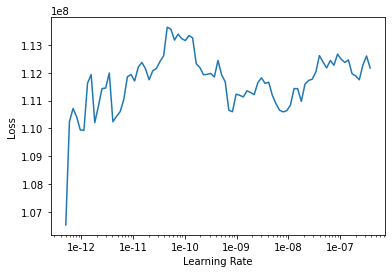

In [54]:
learn.lr_find(start_lr=1e-13, end_lr=1e-6)
learn.recorder.plot()

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,89936304.000000,88575056.000000,9394.979492,01:04
1,6607067.000000,6417489.500000,2516.197266,01:06
2,6083465.500000,5975015.500000,2426.288330,01:05
3,5845776.500000,5850791.000000,2400.976562,01:06
4,5740661.500000,5779940.000000,2385.466064,01:06
5,4987963.000000,5841347.000000,2397.078613,01:06


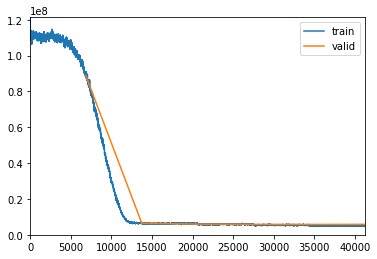

In [11]:
learn.fit_one_cycle(6)

In [12]:
learn.save(modelpath+'model256-128-32-1')

In [74]:
# learn.load(modelpath+'model256-128-32-1')
# learn.recorder.plot_lr() # Learning rate during training

##### Feature Importance 

In [83]:
def feature_importance(learner): 
  # based on: https://medium.com/@mp.music93/neural-networks-feature-importance-with-fastai-5c393cf65815
    data = learner.data.train_ds.x
    cat_names = data.cat_names
    cont_names = data.cont_names
    loss0=np.array([learner.loss_func(learner.pred_batch(batch=(x,y.to("cpu"))), y.to("cpu")) for x,y in iter(learner.data.valid_dl)]).mean()
    fi=dict()
    types=[cat_names, cont_names]
    for j, t in enumerate(types):
      for i, c in enumerate(t):
        loss=[]
        for x,y in iter(learner.data.valid_dl):
          col=x[j][:,i]    #x[0] da hier cat-vars
          idx = torch.randperm(col.nelement())
          x[j][:,i] = col.view(-1)[idx].view(col.size())
          y=y.to('cpu')
          loss.append(learner.loss_func(learner.pred_batch(batch=(x,y)), y))
        fi[c]=np.array(loss).mean()-loss0
    d = sorted(fi.items(), key=lambda kv: kv[1], reverse=True)
    return pd.DataFrame({'cols': [l for l, v in d], 'imp': np.log1p([v for l, v in d])})

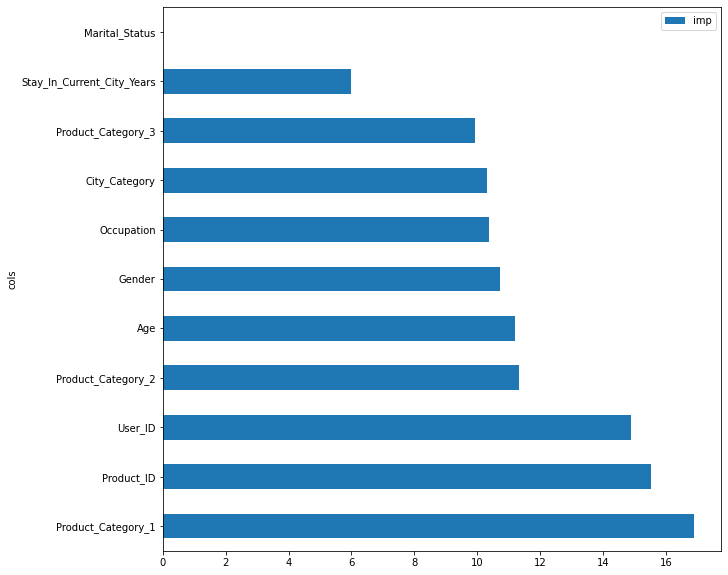

In [84]:
fi = feature_importance(learn)
fi[:20].plot.barh(x="cols", y="imp", figsize=(10, 10))

#### Model 2: [256, 128, 64, 32, 1]

In [57]:
learn2 = tabular_learner(data, layers=[256,128,64,32], metrics=rmse, callback_fns=ShowGraph)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,75845728.000000,74945392.000000,8642.869141,01:10
1,6882373.000000,6202635.000000,2469.718506,01:08
2,5941342.500000,5945602.500000,2417.976074,01:08
3,5758496.000000,5907782.500000,2412.373291,01:08
4,5435530.500000,5840192.500000,2397.498535,01:08


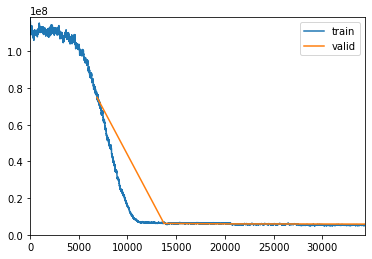

In [58]:
learn2.fit_one_cycle(5)

In [59]:
learn2.save(modelpath+'model256-128-32-1')

#### Method 3: 2-Variable Embedding

Use only User_ID and Product_ID since they represent all important other sub variables

In [92]:
train2 = train[['User_ID','Product_ID','Purchase']]
test2 = test[['User_ID','Product_ID']]

cat_names = ['User_ID', 'Product_ID']          
cont_names = []
dep_var = 'Purchase'

test_df2 = TabularList.from_df(test2, cat_names=cat_names, cont_names=cont_names)
procs = [Categorify]

data2 = (TabularList.from_df(train2, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                            .split_by_rand_pct(valid_pct = 0.2, seed=4)
                            .label_from_df(cols=dep_var, label_cls=FloatList)
                            .add_test(test_df2).databunch())

In [93]:
nn2 = tabular_learner(data2, layers=[200,100], metrics=rmse, callback_fns=ShowGraph)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,65635612.000000,63716100.000000,7970.745605,00:47
1,6660550.000000,6531996.000000,2534.905029,00:46
2,6507581.500000,6163184.000000,2462.691650,00:46
3,6471715.000000,6062212.000000,2443.225830,00:46
4,6013009.500000,5932888.000000,2416.377197,00:46
5,5632419.000000,5851049.000000,2398.188232,00:45
6,5303948.000000,5940869.000000,2417.424072,00:46
7,4801751.000000,5986341.000000,2426.405518,00:45


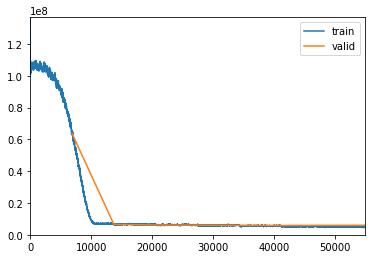

In [95]:
nn2.fit_one_cycle(8)

In [96]:
nn2.save(modelpath+'model200-100-2')

#### Average Prediction

In [86]:
# get predictions
learn.load(modelpath+'model256-128-32-1')
preds,_ = learn.get_preds(ds_type=DatasetType.Test)
tpreds = np.array(preds)
predict = tpreds.reshape(-1,)

learn2.load(modelpath+'model256-128-32-1')
preds2,_ = learn2.get_preds(ds_type=DatasetType.Test)
tpreds2 = np.array(preds2)
predict2 = tpreds2.reshape(-1,)

nn2.load(modelpath+'model200-100-1')
preds3,_ = nn2.get_preds(ds_type=DatasetType.Test)
tpreds3 = np.array(preds3)
predict3 = tpreds3.reshape(-1,)

In [97]:
nn2.load(modelpath+'model200-100-2')
preds3,_ = nn2.get_preds(ds_type=DatasetType.Test)
tpreds3 = np.array(preds3)
predict3 = tpreds3.reshape(-1,)

In [88]:
av_preds = (predict+predict2+predict3)/3
df = pd.DataFrame({'Purchase':av_preds, 'User_ID':test.User_ID, 'Product_ID':test.Product_ID}, 
                  columns=['Purchase','User_ID', 'Product_ID'])
df.to_csv(path+'av_Embed.csv', index=False)

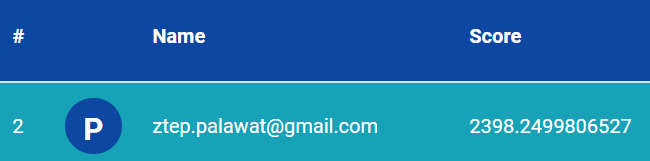